In [ ]:
# 구글 마운트 시키기
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#글꼴을 위한 나눔 폰트 설치
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,957 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122519 files and di

In [ ]:
# 필요한 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import font_manager,rc  #한글 폰트 입력을 위한 라이브러리
import matplotlib.pyplot as plt   #그래프 그리기 위한 라이브러리
plt.rc('font', family = 'NanumBarunGothic')


# 자치구 수정하기 전 데이터 불러오기(실행 X)

In [ ]:
# 서울시 불법주차장 안내정보 불러오기
#df = pd.read_csv('/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트 (1)/Data/서울시 불법주정차_전용차로 위반 단속 CCTV 위치정보.csv', encoding = 'cp949')
#df

# 자치구 수정하기 전 데이터 - 데이터 전처리1 (실행 x)
1. 결측치 확인
2. 데이터 추출 : '현장구분'에서 불법주정차 구역만 추출하기 -> '자치구'파악하기

In [ ]:
# 원본 데이터에 결측치 얼만큼 있는지 확인하기
#df.isnull().sum(0)

In [ ]:
# 현장구분 열에 3개의 값들이 있는데 그 중에서 불법주정차 구역만 필요함.
#df['현장구분'].unique()

In [ ]:
# '현장구분'열에서 불법주정차구역만 추출하기
#df2 = df[df['현장구분']=='불법주정차구역']
#df2

In [ ]:
#df2['자치구'].unique()

In [ ]:
#25개 자치구 모두 있는지 확인 
#df2['자치구'].nunique()
# 주차지도팀이 있음.

In [ ]:
#df2[df2['자치구']=='주차지도팀']

In [ ]:
# 주차지도팀 단속지정명 데이터 바꾸기
#df2.to_csv('/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/df2.csv', encoding = 'cp949')

# 데이터 바꾼 거 불러오기

In [ ]:
# 데이터 변환
# 주차지도팀을 가지고 있는 데이터를 주소를 기반으로 25개의 자치구로 변환하기


In [ ]:
# 바꾼 데이터 불러오기
df = pd.read_csv('/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/df_illegal.csv', encoding = 'cp949')
df

,Unnamed: 0,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,0,서울 양천구 목4동 762-10,37.535891,126.870566,양천구,목4동 영도초등학교 주변,불법주정차구역
1,1,서울 양천구 목4동 797-8,37.532740,126.867191,양천구,목4동 태학관 주변,불법주정차구역
2,2,서울 양천구 신월2동 496,37.524535,126.848224,양천구,신월2동 양강초교 후문 주변,불법주정차구역
3,3,서울 양천구 신월7동 928-1,37.522349,126.833529,양천구,신월7동 우성상가 주변,불법주정차구역
4,4,서울 양천구 목1동 917,37.528982,126.874597,양천구,목1동 파라곤(SBS) 주변,불법주정차구역
...,...,...,...,...,...,...,...
3882,3996,서울 중구 을지로 281,37.566248,127.010901,중구,DDP디자인갤러리P5입구,불법주정차구역
3883,3997,서울 중구 필동2가 116-1,37.557660,126.995650,중구,필동어린이집,불법주정차구역
3884,3998,서울 중랑구 망우동 216,37.605234,127.104448,중랑구,동원초등학교 정문,불법주정차구역
3885,3999,서울시 중구 신당동 251-160,37.566220,127.011929,중구,동대문 한국산업단지공단,불법주정차구역


In [ ]:
df = df.iloc[:, 1:]
df

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,서울 양천구 목4동 762-10,37.535891,126.870566,양천구,목4동 영도초등학교 주변,불법주정차구역
1,서울 양천구 목4동 797-8,37.532740,126.867191,양천구,목4동 태학관 주변,불법주정차구역
2,서울 양천구 신월2동 496,37.524535,126.848224,양천구,신월2동 양강초교 후문 주변,불법주정차구역
3,서울 양천구 신월7동 928-1,37.522349,126.833529,양천구,신월7동 우성상가 주변,불법주정차구역
4,서울 양천구 목1동 917,37.528982,126.874597,양천구,목1동 파라곤(SBS) 주변,불법주정차구역
...,...,...,...,...,...,...
3882,서울 중구 을지로 281,37.566248,127.010901,중구,DDP디자인갤러리P5입구,불법주정차구역
3883,서울 중구 필동2가 116-1,37.557660,126.995650,중구,필동어린이집,불법주정차구역
3884,서울 중랑구 망우동 216,37.605234,127.104448,중랑구,동원초등학교 정문,불법주정차구역
3885,서울시 중구 신당동 251-160,37.566220,127.011929,중구,동대문 한국산업단지공단,불법주정차구역


In [ ]:
# 데이터 결측치 있는지 없는지 확인
df.isnull().sum(0)

고정형CCTV지번주소    0
위도             0
경도             0
자치구            0
단속지점명          0
현장구분           0
dtype: int64

In [ ]:
# 자치구 열에 자치구 25개 말고 다른 거 있는지 확인
df['자치구'].nunique()

25

In [ ]:
df['자치구'].unique()

array(['양천구', '광진구', '중랑구', '서초구', '도봉구', '강북구', '성북구', '중구', '성동구',
       '강남구', '서대문구', '은평구', '동대문구', '영등포구', '용산구', '마포구', '강서구', '관악구',
       '동작구', '송파구', '노원구', '구로구', '종로구', '강동구', '금천구'], dtype=object)

In [ ]:
# 자치구를 중심으로 몇 건의 데이터과 관측되었는지 확인하기
df_count = df['자치구'].value_counts()
df_count

서초구     423
강남구     359
성북구     240
관악구     212
은평구     193
중구      185
영등포구    180
종로구     180
성동구     171
노원구     158
마포구     142
송파구     138
구로구     129
양천구     126
서대문구    126
강서구     120
강북구     118
도봉구     117
중랑구      92
용산구      91
강동구      91
동대문구     89
금천구      72
동작구      71
광진구      64
Name: 자치구, dtype: int64

In [ ]:
df_count.dtype

dtype('int64')

In [ ]:
df_count = pd.DataFrame(df_count)
df_count

,자치구
서초구,423
강남구,359
성북구,240
관악구,212
은평구,193
중구,185
영등포구,180
종로구,180
성동구,171
노원구,158


In [ ]:
df_count.reset_index(inplace=True)

In [ ]:
df_count.columns = ['자치구', "CCTV_count"]
df_count

,자치구,CCTV_count
0,서초구,423
1,강남구,359
2,성북구,240
3,관악구,212
4,은평구,193
5,중구,185
6,영등포구,180
7,종로구,180
8,성동구,171
9,노원구,158


In [ ]:
df_count['CCTV_count'].sum()

3887

In [ ]:
df_count.sort_values('자치구')
df_count

,자치구,CCTV_count
0,서초구,423
1,강남구,359
2,성북구,240
3,관악구,212
4,은평구,193
5,중구,185
6,영등포구,180
7,종로구,180
8,성동구,171
9,노원구,158


In [ ]:
df_count["자치구"]

0      서초구
1      강남구
2      성북구
3      관악구
4      은평구
5       중구
6     영등포구
7      종로구
8      성동구
9      노원구
10     마포구
11     송파구
12     구로구
13     양천구
14    서대문구
15     강서구
16     강북구
17     도봉구
18     중랑구
19     용산구
20     강동구
21    동대문구
22     금천구
23     동작구
24     광진구
Name: 자치구, dtype: object

In [ ]:
seoul_area = {"면적" : [46.98, 39.5, 24.58,29.57, 29.71, 9.96, 24.55, 23.91,16.86, 35.44,23.85, 33.88,
                      20.12,17.41, 17.63,41.45,23.6,20.65, 18.5,21.87,24.59, 14.22,13.02,16.36,17.06],
              "비율" : [7.76, 6.53, 4.06, 4.89, 4.91, 1.65, 4.06, 3.95, 2.79,  5.86, 3.94, 5.6, 3.32,
                      2.88,  2.91, 6.85, 3.9, 3.41,  3.06, 3.61, 4.06,  2.35, 2.15, 2.7, 2.82 ]
              }
seoul_count = {"건수" : [138560 , 234023, 40401, 83226, 52757, 182320, 101742, 112082, 60161,
 58605,
 95923,
 97753,
 69162,
 70248,
 45879,
 145065,
 47523,
 48377,
41410,
 83674,
56574,
 71294,
 44746,
 57340,
 42221]}

In [ ]:
import pandas as pd

In [ ]:
seoul_area = pd.DataFrame(seoul_area)
seoul_count = pd.DataFrame(seoul_count)

In [ ]:
#다시 불법주정차 건수
df_seoul_again = pd.concat([seoul_count, seoul_area], axis = 1)
df_seoul_again

,건수,면적,비율
0,138560,46.98,7.76
1,234023,39.50,6.53
2,40401,24.58,4.06
3,83226,29.57,4.89
4,52757,29.71,4.91
5,182320,9.96,1.65
6,101742,24.55,4.06
7,112082,23.91,3.95
8,60161,16.86,2.79
9,58605,35.44,5.86


In [ ]:
df_seoul = pd.concat([df_count, seoul_area, seoul_count], axis = 1)
df_seoul

,자치구,CCTV_count,면적,비율,건수
0,서초구,423,46.98,7.76,138560
1,강남구,359,39.50,6.53,234023
2,성북구,240,24.58,4.06,40401
3,관악구,212,29.57,4.89,83226
4,은평구,193,29.71,4.91,52757
5,중구,185,9.96,1.65,182320
6,영등포구,180,24.55,4.06,101742
7,종로구,180,23.91,3.95,112082
8,성동구,171,16.86,2.79,60161
9,노원구,158,35.44,5.86,58605


In [ ]:
df_seoul['자치구/면적'] = df_seoul['건수']/df_seoul['면적']
df_seoul 

,자치구,CCTV_count,면적,비율,건수,자치구/면적
0,서초구,423,46.98,7.76,138560,2949.340145
1,강남구,359,39.50,6.53,234023,5924.632911
2,성북구,240,24.58,4.06,40401,1643.653377
3,관악구,212,29.57,4.89,83226,2814.541765
4,은평구,193,29.71,4.91,52757,1775.732077
5,중구,185,9.96,1.65,182320,18305.220884
6,영등포구,180,24.55,4.06,101742,4144.276986
7,종로구,180,23.91,3.95,112082,4687.662066
8,성동구,171,16.86,2.79,60161,3568.268090
9,노원구,158,35.44,5.86,58605,1653.639955


In [ ]:
df_seoul['자치구/비율'] = df_seoul['건수']/df_seoul['비율']
df_seoul 

,자치구,CCTV_count,면적,비율,건수,자치구/면적,자치구/비율
0,서초구,423,46.98,7.76,138560,2949.340145,17855.670103
1,강남구,359,39.50,6.53,234023,5924.632911,35838.131700
2,성북구,240,24.58,4.06,40401,1643.653377,9950.985222
3,관악구,212,29.57,4.89,83226,2814.541765,17019.631902
4,은평구,193,29.71,4.91,52757,1775.732077,10744.806517
5,중구,185,9.96,1.65,182320,18305.220884,110496.969697
6,영등포구,180,24.55,4.06,101742,4144.276986,25059.605911
7,종로구,180,23.91,3.95,112082,4687.662066,28375.189873
8,성동구,171,16.86,2.79,60161,3568.268090,21563.082437
9,노원구,158,35.44,5.86,58605,1653.639955,10000.853242


In [ ]:
df_seoul 

,자치구,CCTV_count,면적,비율,건수,자치구/면적,자치구/비율
0,서초구,423,46.98,7.76,138560,2949.340145,17855.670103
1,강남구,359,39.50,6.53,234023,5924.632911,35838.131700
2,성북구,240,24.58,4.06,40401,1643.653377,9950.985222
3,관악구,212,29.57,4.89,83226,2814.541765,17019.631902
4,은평구,193,29.71,4.91,52757,1775.732077,10744.806517
5,중구,185,9.96,1.65,182320,18305.220884,110496.969697
6,영등포구,180,24.55,4.06,101742,4144.276986,25059.605911
7,종로구,180,23.91,3.95,112082,4687.662066,28375.189873
8,성동구,171,16.86,2.79,60161,3568.268090,21563.082437
9,노원구,158,35.44,5.86,58605,1653.639955,10000.853242


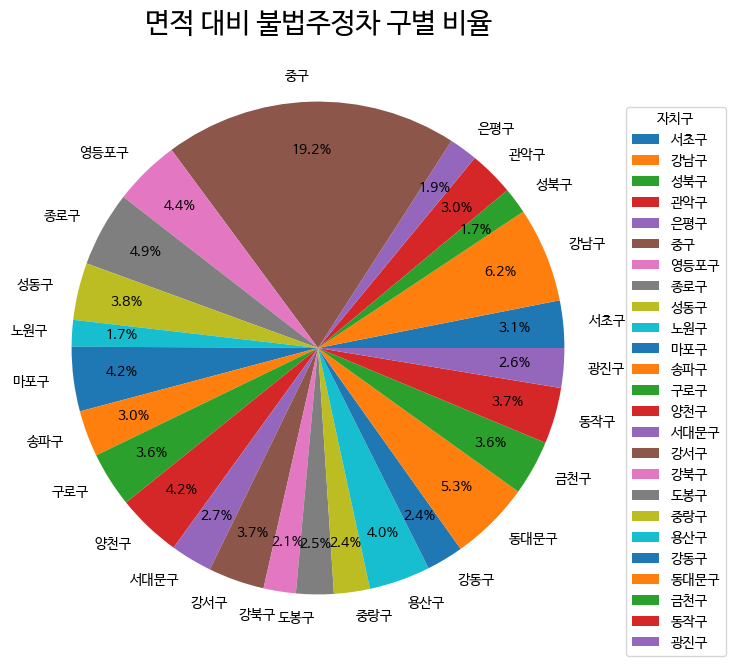

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (13, 8))
plt.pie(df_seoul['자치구/면적'], labels  = df_seoul['자치구'], autopct = '%.1f%%', pctdistance = 0.8)
plt.title('면적 대비 불법주정차 구별 비율', size= 20)
plt.legend(df_seoul['자치구'], loc =(1, 0), title = '자치구' )
plt.show()
plt.savefig('/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/piechart.png')

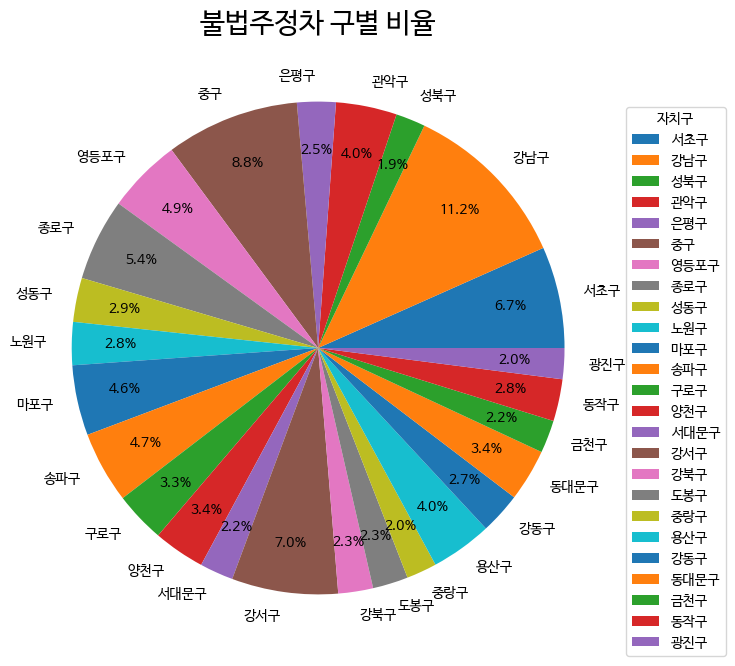

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (13, 8))
plt.pie(df_seoul['건수'], labels  = df_seoul['자치구'], autopct = '%.1f%%', pctdistance = 0.8)
plt.title('불법주정차 구별 비율', size= 20)
plt.legend(df_seoul['자치구'], loc =(1, 0), title = '자치구' )
plt.show()
plt.savefig('/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/piechart.png')

In [ ]:
plt.savefig('/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/piechart.png')

<Figure size 432x288 with 0 Axes>

# 불법주정차 건수 1, 2, 3위
* 서초구, 강남구, 성북구

In [ ]:
df_top3 = df_seoul.head(3)
df_top3

,자치구,CCTV_count,면적,비율,건수,자치구/면적,자치구/비율
0,서초구,423,46.98,7.76,138560,2949.340145,17855.670103
1,강남구,359,39.50,6.53,234023,5924.632911,35838.131700
2,성북구,240,24.58,4.06,40401,1643.653377,9950.985222


In [ ]:
df_seoul.loc[1, "count"] / df_seoul.loc[5, "count"]

1.9405405405405405

# 블록 별로 시각화

In [ ]:
df_seoul

,자치구,CCTV_count,면적,비율,건수,자치구/면적,자치구/비율
0,서초구,423,46.98,7.76,138560,2949.340145,17855.670103
1,강남구,359,39.50,6.53,234023,5924.632911,35838.131700
2,성북구,240,24.58,4.06,40401,1643.653377,9950.985222
3,관악구,212,29.57,4.89,83226,2814.541765,17019.631902
4,은평구,193,29.71,4.91,52757,1775.732077,10744.806517
5,중구,185,9.96,1.65,182320,18305.220884,110496.969697
6,영등포구,180,24.55,4.06,101742,4144.276986,25059.605911
7,종로구,180,23.91,3.95,112082,4687.662066,28375.189873
8,성동구,171,16.86,2.79,60161,3568.268090,21563.082437
9,노원구,158,35.44,5.86,58605,1653.639955,10000.853242


In [ ]:
import folium
import json
import urllib.request

In [ ]:
url = "https://raw.githubusercontent.com/PinkWink/DataScience/master/data/02.%20skorea_municipalities_geo_simple.json"
text_data = urllib.request.urlopen(url).read().decode('utf-8')
geo = json.loads(text_data)

In [ ]:
geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [ ]:
df_seoul.index

RangeIndex(start=0, stop=25, step=1)

In [ ]:
df_seoul1 = df_seoul.set_index(["자치구"])
df_seoul1.index

Index(['서초구', '강남구', '성북구', '관악구', '은평구', '중구', '영등포구', '종로구', '성동구', '노원구',
       '마포구', '송파구', '구로구', '양천구', '서대문구', '강서구', '강북구', '도봉구', '중랑구', '용산구',
       '강동구', '동대문구', '금천구', '동작구', '광진구'],
      dtype='object', name='자치구')

In [ ]:
df_seoul1.dtypes

CCTV_count      int64
면적            float64
비율            float64
건수              int64
자치구/면적        float64
자치구/비율        float64
dtype: object

In [ ]:
import geopy

# geopy 라이브러리를 import 해주어야 함 
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea') 
# user_agent='South Korea' 한글주소를 지오코딩 할 수 있음

# 위도, 경도값을 반환하는 함수 생성. 
def geocoding(r_add):
 geo = geo_local.geocode(r_add)
 x_y = [geo.latitude, geo.longitude] # 주소에 맞는 위도 경도를 [x, y] 형태의 리스트로 반환해라
 return x_y



In [ ]:
latitude = []
longitude= []
for i in df_seoul1.index:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])


In [ ]:
address = {}
for i in range(len(latitude)):
    s = df_seoul1.index[i]
    lat = latitude[i]
    long = longitude[i]
    add = (lat, long)
    address[s] = add

In [ ]:
address

{'서초구': (37.4835, 127.0322),
 '강남구': (37.5177, 127.0473),
 '성북구': (37.59, 127.0165),
 '관악구': (37.4782, 126.9518),
 '은평구': (37.6024, 126.9293),
 '중구': (37.5636559, 126.9975097),
 '영등포구': (37.5262, 126.8959),
 '종로구': (37.5806949, 126.9827989),
 '성동구': (37.5635, 127.0365),
 '노원구': (37.654, 127.0567),
 '마포구': (37.566571, 126.9015317),
 '송파구': (37.5145, 127.1058),
 '구로구': (37.4951999, 126.8877),
 '양천구': (37.5171, 126.8663),
 '서대문구': (37.5790747, 126.9367861),
 '강서구': (37.5509, 126.8497),
 '강북구': (37.6395, 127.0255),
 '도봉구': (37.6686, 127.0466),
 '중랑구': (37.6063, 127.093),
 '용산구': (37.5323, 126.99),
 '강동구': (37.53, 127.1237),
 '동대문구': (37.5741982, 127.0395092),
 '금천구': (37.4565, 126.8954),
 '동작구': (37.5120999, 126.9395),
 '광진구': (37.5384, 127.0828)}

In [ ]:
import folium
from folium.features import DivIcon

In [ ]:
map = folium.Map(location=[37.5502, 126.982],   # 지도의 중심 위치(위도, 경도)
				 zoom_start=11,                 # 0~18 단계
                 tiles='Stamen Toner') # Stamen Toner, Stamen Terrain, ...

# 지도에 영역 표시
folium.Choropleth(geo_data = geo,
               data = df_seoul1['자치구/면적'],
               columns = [ df_seoul1.index, df_seoul1['자치구/면적']],
               line_weight = 2,
               fill_color = 'PuRd', #PuRd, YlGnBu
               legend_name='illegal parking',
               key_on = 'feature.id').add_to(map)

for key, value in address.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(0, 0),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.3rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key + ': ' + str()
            + "<br/><span style='color: blue; margin: 0px;'> "
            + str(round(df_seoul1.loc[key, '자치구/면적'],2)) + '</span>'
            + '</b></div>',
        )).add_to(map)
map

In [ ]:
#정보없는 거
map1 = folium.Map(location=[37.5502, 126.982],   # 지도의 중심 위치(위도, 경도)
				 zoom_start=11,                 # 0~18 단계
                 tiles='Stamen Toner') # Stamen Toner, Stamen Terrain, ...

# 지도에 영역 표시
folium.Choropleth(geo_data = geo,
               data = df_seoul1['자치구/면적'],
               columns = [ df_seoul1.index, df_seoul1['자치구/면적']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id').add_to(map1)
map1